NAME : RIZA JAMES PETER
ASSIGNMENT NO-5
Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.


In [ ]:
#Step 1:Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Step 2:Loading dataset
data = pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
#Step 3:Data preprocessing
#Checking null values
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

There isn't any missing values.

In [ ]:
#Step 4: Extracting the predictors and target values
predictors =['Age','EstimatedSalary']
target =['Purchased']
x = data[predictors].values
y = data[target].values

In [ ]:
#Step 5: Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

<Axes: >

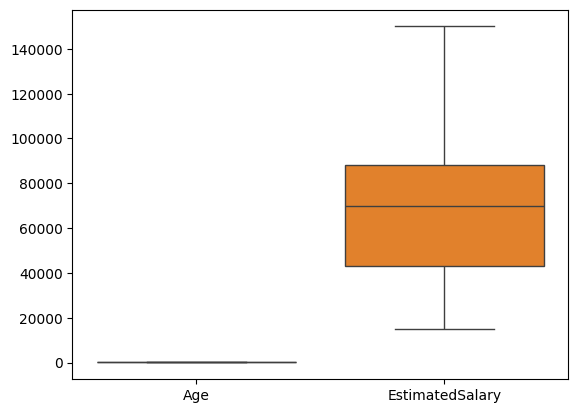

In [ ]:
#Step 6:checking for outliers
import seaborn as sns
sns.boxplot(data=data[predictors])

We observe from the boxplot that there are no outliers present.

In [ ]:
#Step 7: Feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

<Axes: >

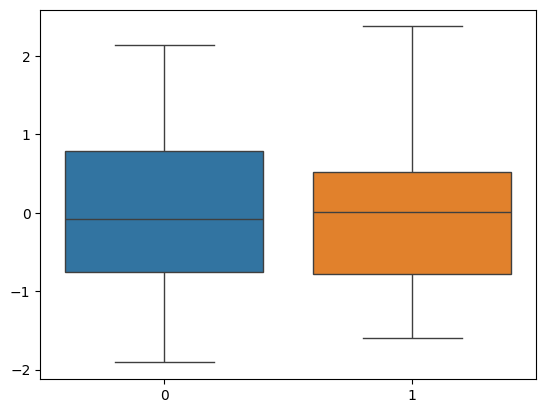

In [ ]:
sns.boxplot(x_train)

In [ ]:
#Step 8:Fitting th model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
print("Performance:",model.score(x_train, y_train))

Performance: 0.85


In [ ]:
#Step 9: confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[45  3]
 [12 20]]


In [ ]:
#Prediction on Real time input from user
age = int(input("Enter the Age: "))
salary = int(input("Enter the Salary: "))
test_sample = [[age,salary]]

Enter the Age: 23
Enter the Salary: 150000


In [ ]:
test_sample = sc.fit_transform(test_sample)

In [ ]:
result = model.predict(test_sample)
print("Purchasing Status:",result)

Purchasing Status: [0]


In [ ]:
if(result[0] == 0):
    print("The person has not purchased the Car")
else:
    print("The person has purchased the Car")

The person has not purchased the Car
